In [9]:
import numpy as np 
import pandas as pd 
import os
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [10]:
# Loading the data
train_x = []
train_y = []
test_x = []
test_y = []
num_of_classes = 11

for i in range(0, num_of_classes):
    path = './train/' + chr(65 + i) + '/'
    files = os.listdir(path)
    print(len(files))
    for file in files:
        img = Image.fromarray(cv2.imread(path + file), 'RGB')
        tmp = np.random.randint(0, 100)
        if tmp < 20:
            train_x.append(np.array(img.resize((32,32))))
            train_y.append(i)
        else:
            test_x.append(np.array(img.resize((32,32))))
            test_y.append(i)

train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = np.array(test_x)
test_y = np.array(test_y)

print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)


50
53
50
50
51
50
50
50
52
51
51
(114, 32, 32, 3)
(114,)
(444, 32, 32, 3)
(444,)


In [11]:
# Normalizing the data
train_x = train_x.reshape(train_x.shape[0], 32*32*3)
test_x = test_x.reshape(test_x.shape[0], 32*32*3)

train_x = preprocessing.normalize(train_x)
test_x = preprocessing.normalize(test_x)

# Training the model
svm_clf = svm.NuSVC(nu=0.1, kernel='rbf', gamma=0.001, random_state=8, verbose=10)

svm_clf.fit(train_x, train_y)

svm_clf.score(test_x, test_y)





[LibSVM]

0.6734234234234234

Text(158.22222222222223, 0.5, 'Truth')

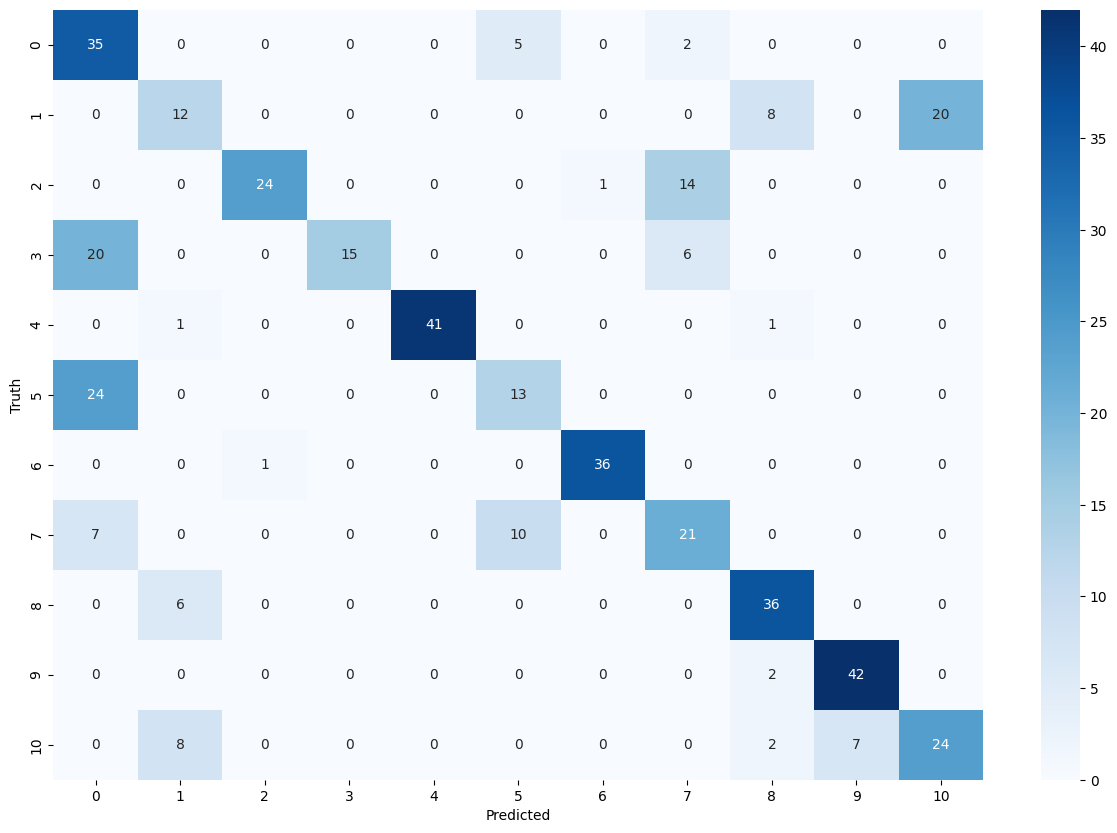

In [12]:
# Predicting the model
svm_pred = svm_clf.predict(test_x)

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(test_y, svm_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')